# Problem Statement
- A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
- **Approach** - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Dataset
cmpny=pd.read_csv("Company_Data.csv")
cmpny

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
# EDA
cmpny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
cmpny.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
cmpny.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

In [6]:
cmpny["ShelveLoc"].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [7]:
cmpny["Urban"].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
cmpny["US"].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
cmpny.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [10]:
cmpny["ShelveLoc"]=cmpny["ShelveLoc"].astype("category")
cmpny["Urban"]=cmpny["Urban"].astype("category")
cmpny["US"]=cmpny["US"].astype("category")

In [11]:
cmpny.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [12]:
list(cmpny.columns)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [13]:
cmpny['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [14]:
cmpny['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [15]:
cmpny['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [16]:
#groupby
cmpny.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                              
Bad       No    No      11         11      11           11          11     11   
                Yes     11         11      11           11          11     11   
          Yes   No      23         23      23           23          23     23   
                Yes     51         51      51           51          51     51   
Good      No    No       6          6       6            6           6      6   
                Yes     22         22      22           22          22     22   
          Yes   No      18         18      18           18          18     18   
                Yes     39         39      39           39          39     39   
Medium    No    No      29         29      29           29          29     29   
                Yes     39         39      39           39          39     39   
          Yes   No      55         55      55           55          55     55   
                Yes     96         96      96           96          96     96   

                     Age  Education  
ShelveLoc Urban US                   
Bad       No    No    11         11  
                Yes   11         11  
          Yes   No    23         23  
                Yes   51         51  
Good      No    No     6          6  
                Yes   22         22  
          Yes   No    18         18  
                Yes   39         39  
Medium    No    No    29         29  
                Yes   39         39  
          Yes   No    55         55  
                Yes   96         96

In [17]:
cmpny.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Label Encoding

In [18]:
label_encoder = LabelEncoder()
cmpny['ShelveLoc']= label_encoder.fit_transform(cmpny['ShelveLoc']) 
cmpny['Urban']= label_encoder.fit_transform(cmpny['Urban'])
cmpny['US']= label_encoder.fit_transform(cmpny['US'])

In [19]:
cmpny['Sales'].mean()

7.496325

In [20]:
cmpny['High']=cmpny.Sales.map(lambda x: 1 if x >7.49 else 0)

In [21]:
cmpny.drop('Sales',inplace=True,axis=1)

In [22]:
cmpny.rename(columns={'High':'Sales'},inplace=True)

In [23]:
cmpny.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


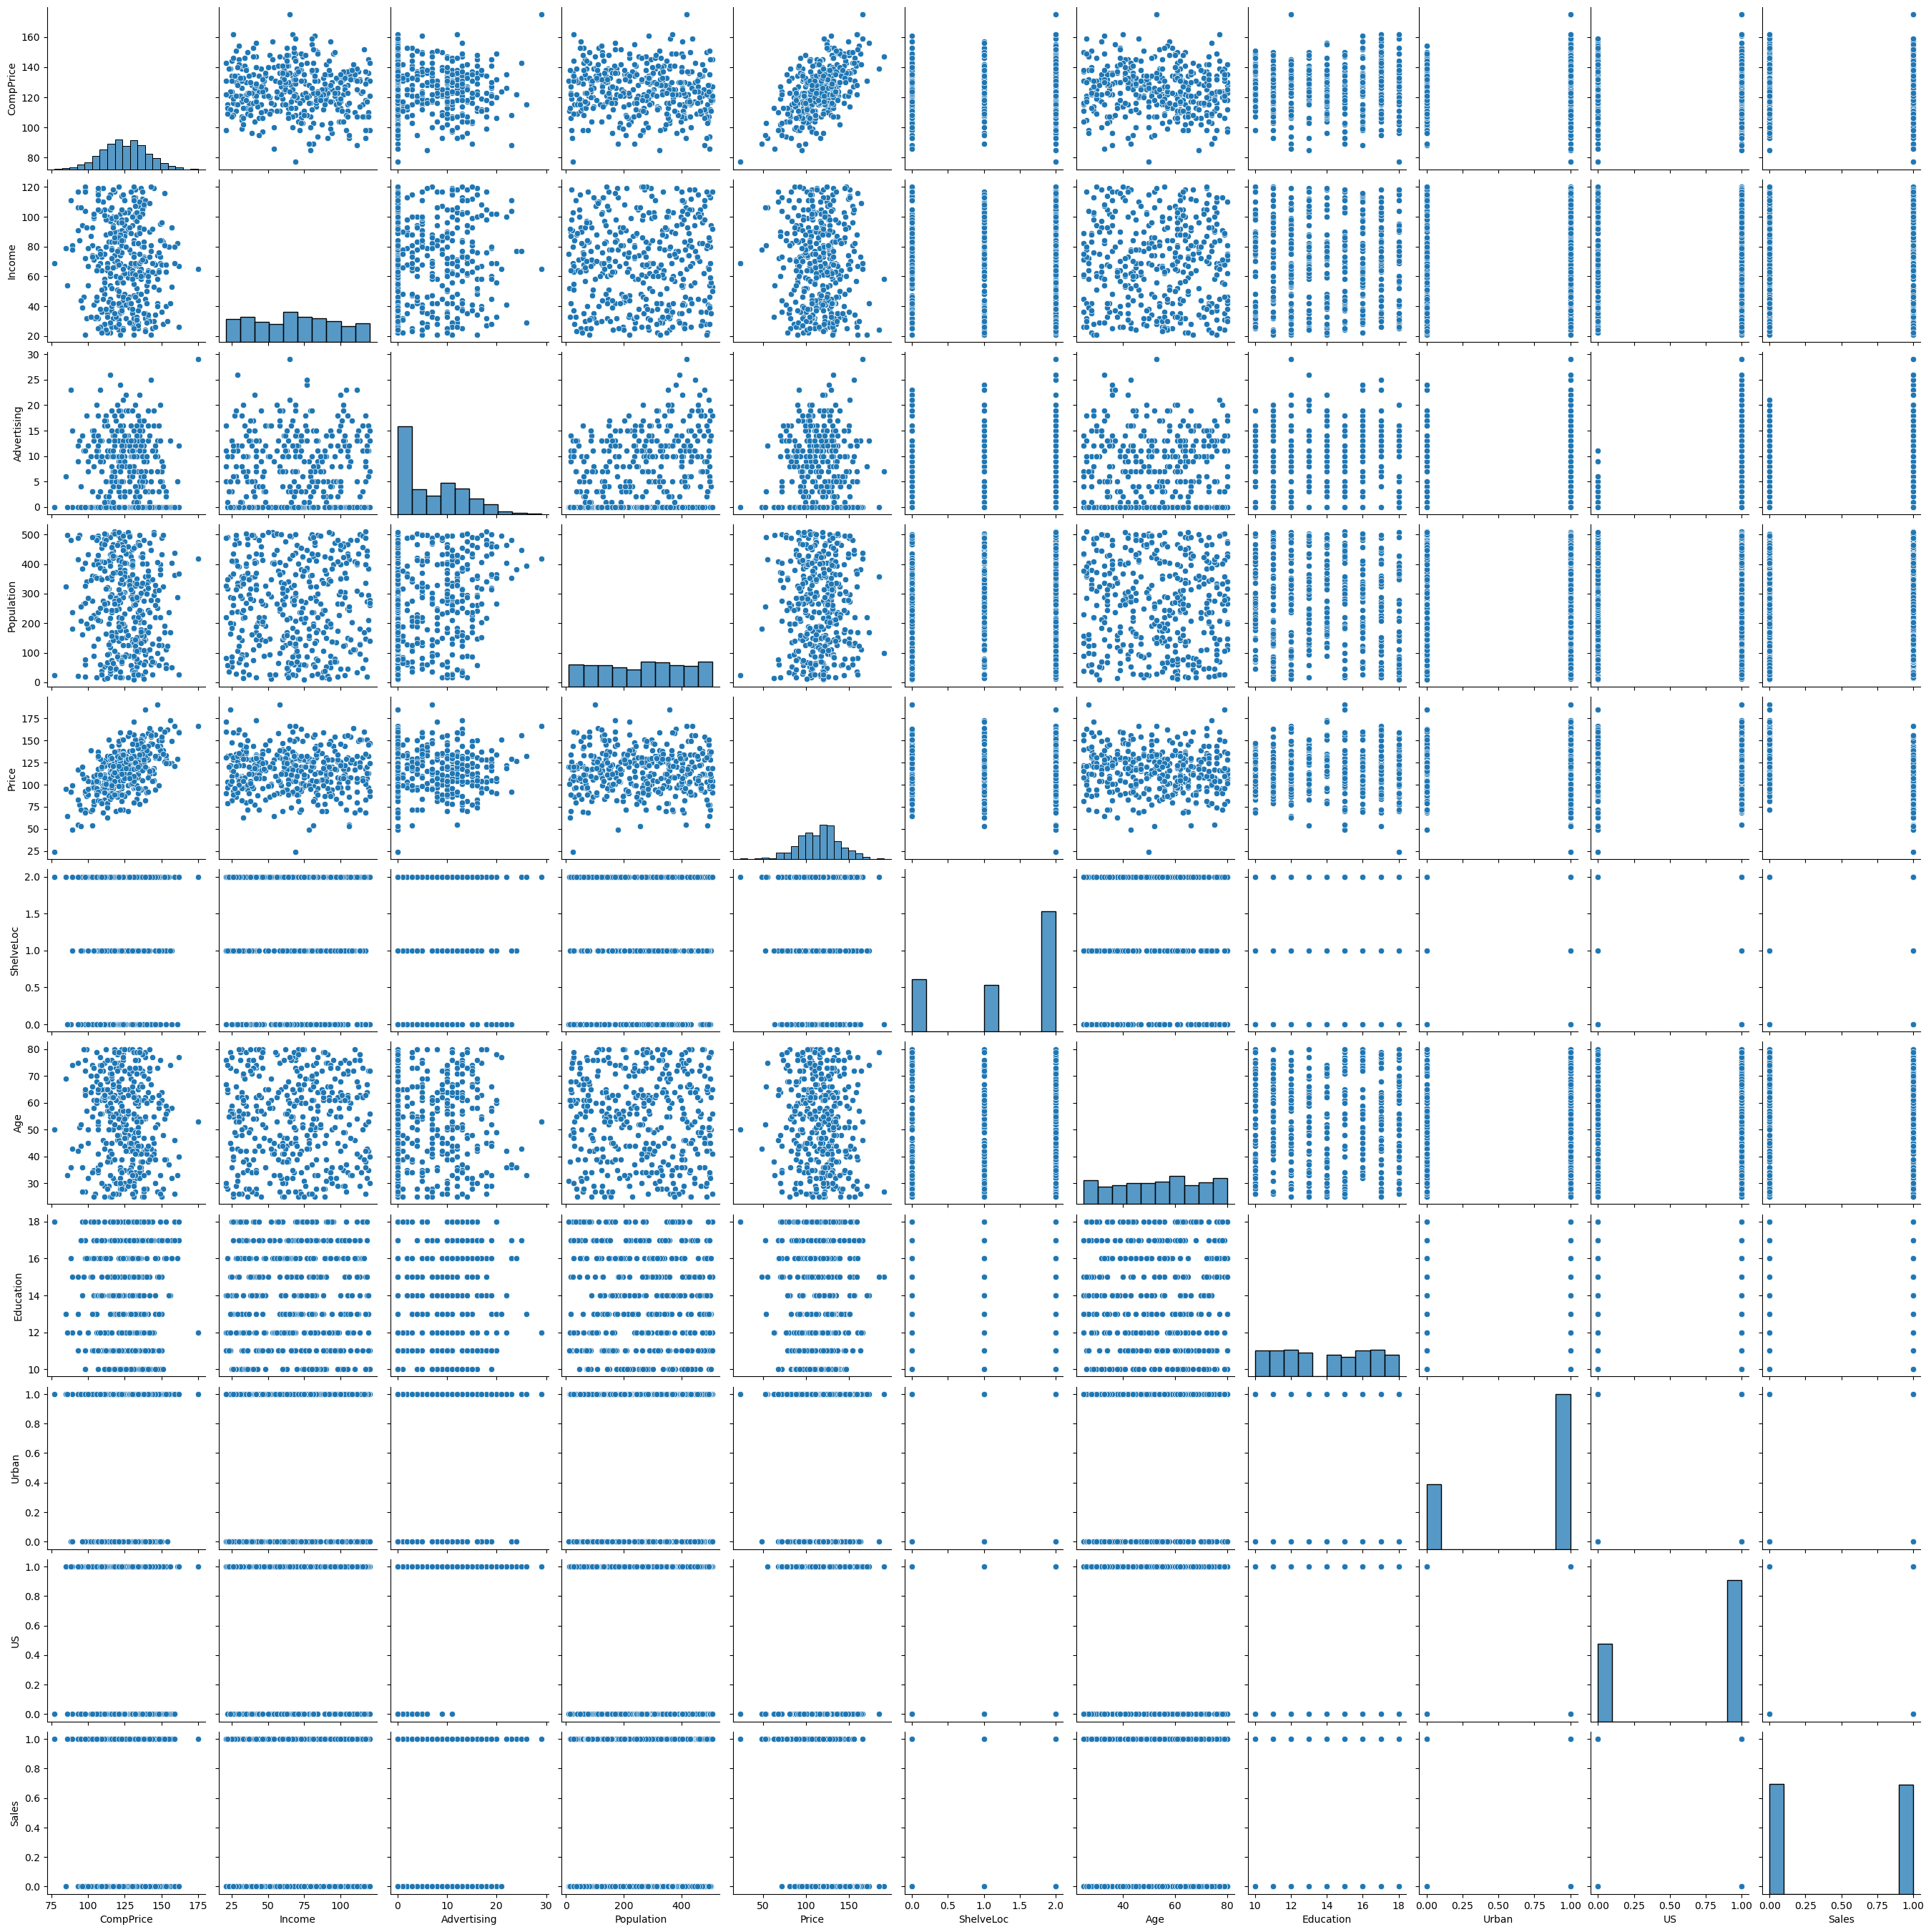

In [24]:
# Visualization
sns.pairplot(cmpny)

<Axes: >

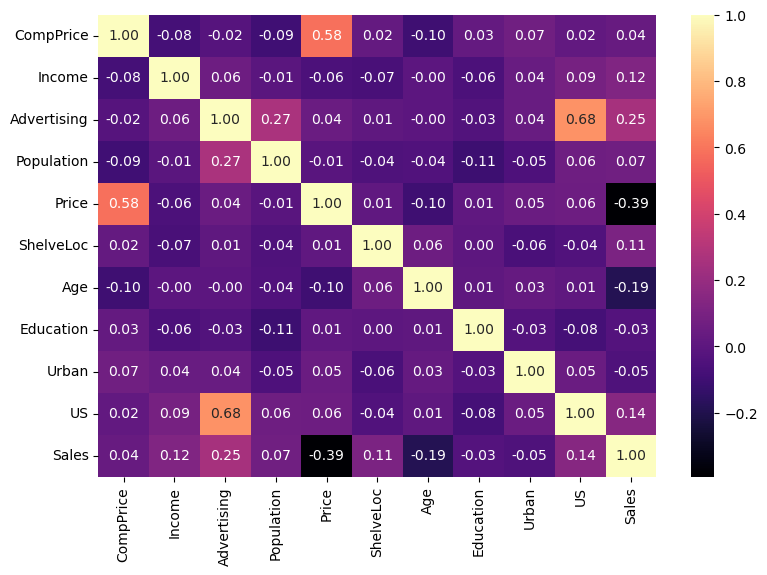

In [25]:
plt.figure(figsize = (9,6));
sns.heatmap(cmpny.corr(), cmap='magma', annot=True, fmt=".2f")

<Axes: >

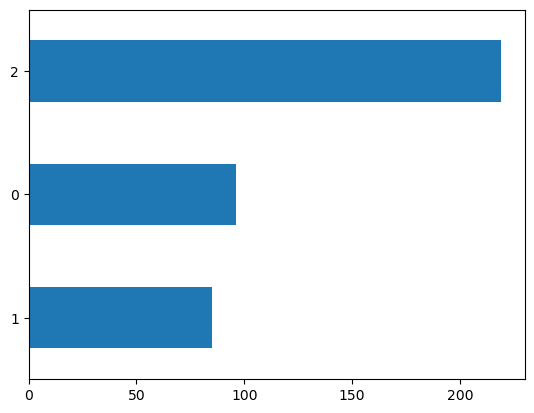

In [26]:
# 0>>Bad,1>>>Good,2>>>Medium
cmpny["ShelveLoc"].value_counts(ascending=True).plot(kind='barh')

In [27]:
# Dependent Variable : y
# Independent Variable : x

In [28]:
x = cmpny.iloc[:,:-1]
y = cmpny['Sales']

In [29]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [30]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [98]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=3)

In [99]:
xtrain

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
239,123,105,0,149,118,0,62,16,1,1
188,116,37,0,426,90,2,76,15,1,0
240,159,80,0,362,121,2,26,18,1,0
23,121,31,0,292,109,2,79,10,1,0
343,117,42,10,371,121,0,26,14,1,1
...,...,...,...,...,...,...,...,...,...,...
256,147,40,0,277,144,2,73,10,1,0
131,108,69,3,208,94,2,77,16,1,0
249,125,67,0,86,117,0,65,11,1,0
152,128,78,0,341,128,1,45,13,0,0


In [100]:
xtest

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
376,141,60,19,319,92,1,44,11,1,1
16,118,32,0,284,110,1,63,13,1,0
365,154,30,0,122,162,2,57,17,0,0
82,151,83,4,325,139,1,28,17,1,1
107,134,107,0,104,108,2,60,12,1,0
...,...,...,...,...,...,...,...,...,...,...
246,120,56,20,266,90,0,78,18,1,1
10,121,78,9,150,100,0,26,10,0,1
115,139,35,0,95,129,2,42,13,1,0
74,150,68,5,125,136,2,64,13,0,1


## DecisionTreeClassifier Using Gini Criteria

In [101]:
classifier =DecisionTreeClassifier(criterion='gini',splitter='best')


In [102]:
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [103]:
y_pred=classifier.predict(xtest)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [104]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        41
           1       0.76      0.79      0.77        39

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.77        80



## DecisionTreeClassifier Using Entropy Criteria

In [105]:
## Hyperparameter Tunning
parameter={
 'criterion':['entropy','gini'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12,15,18]
    
}


In [106]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=parameter, cv=5)

In [107]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 15,
                                       18],
                         'splitter': ['best', 'random']})

In [108]:
ypred=grid.predict(xtest)

In [109]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}

In [132]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='random',random_state=42)

In [133]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.84      0.79      0.82        39

    accuracy                           0.82        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.83      0.82      0.82        80



In [134]:
print("Training Accuracy:", dt.score(xtrain,ytrain))
print("Testing Accuracy:" ,dt.score(xtest,ytest))

Training Accuracy: 0.828125
Testing Accuracy: 0.825


In [135]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250

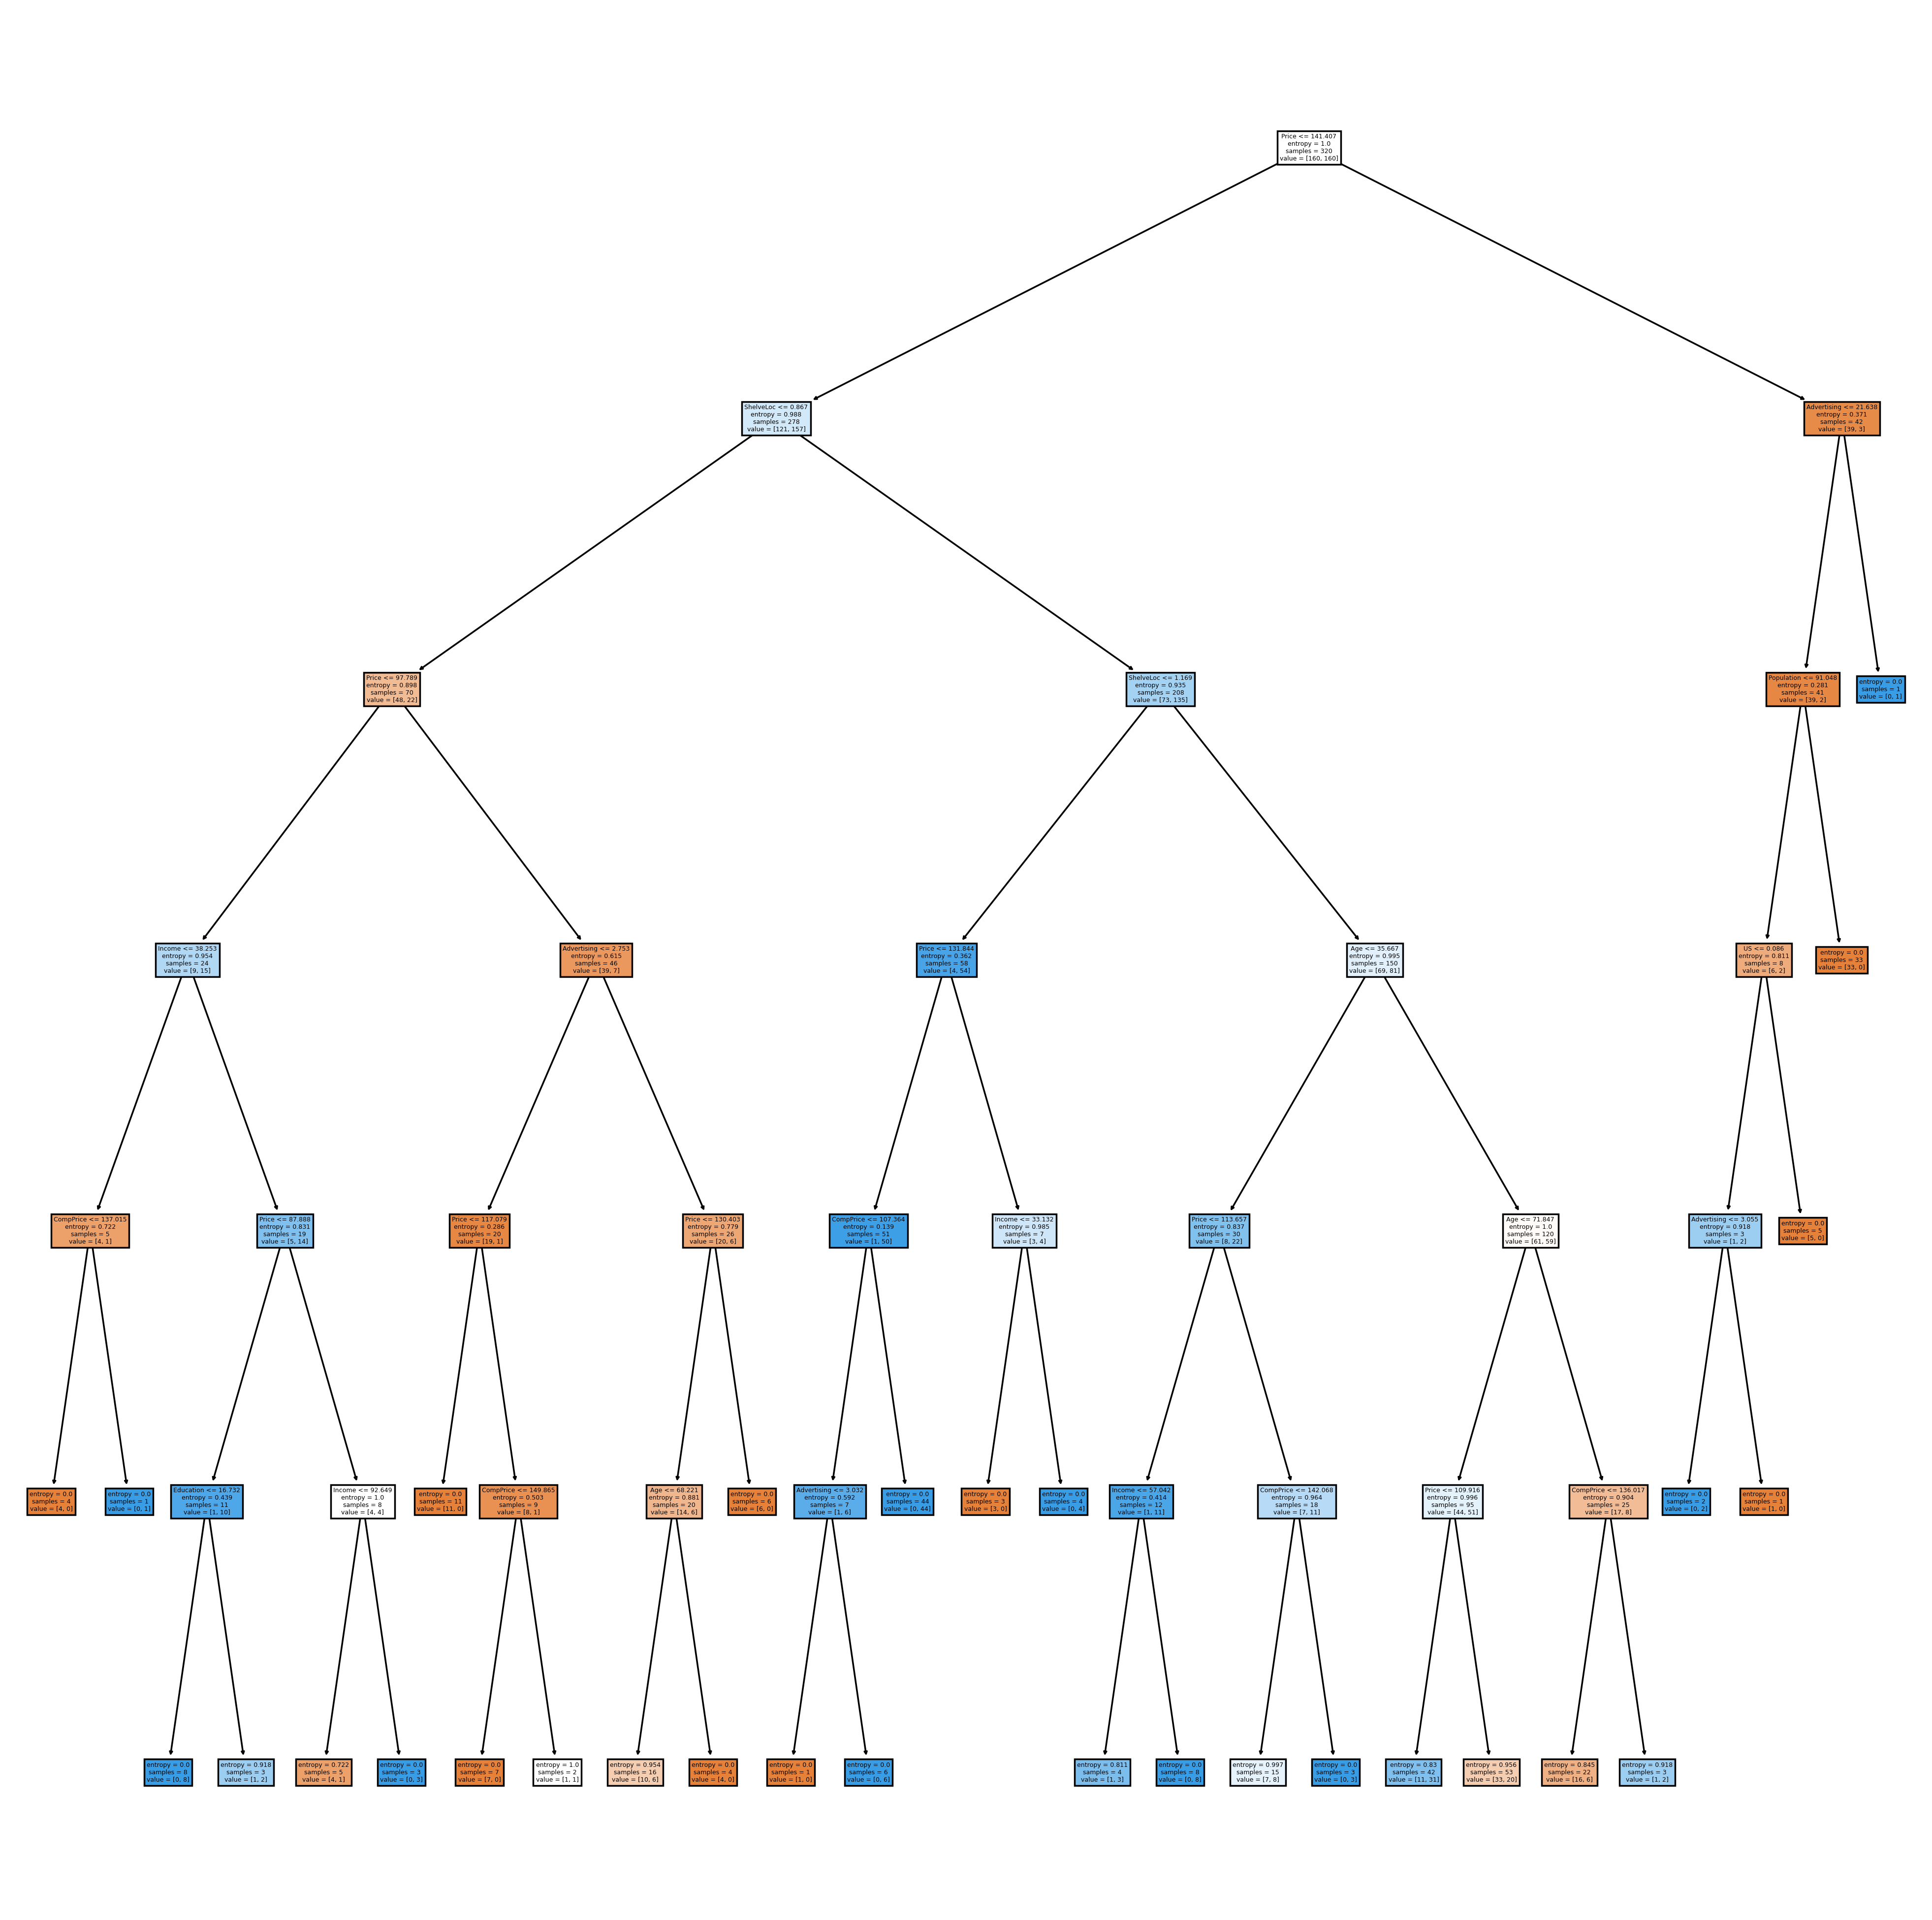

In [136]:
tree.plot_tree(dt, feature_names=x.columns,filled=True)
plt.show()